# Billionaires in the Technology Industry
### <span style="color:#83898b">*Exploring their relationships, individuality, and the state of the technology sector*</span>


Reshawn Lofters, November 2023

## Introduction

In the interconnected world of the 21st century, the technology industry has become a coveted sector, shaping how we live, work, and connect. The increased demand for expertise in this sector has made it a focal point for aspiring professionals and enthusiasts, apparent in the continuous rise of job opportunities. This innovative environment has led to the formation of billionaires within the industry, who not only define the sector trajectory but are also considered some of the most influential leaders of our time. These individuals have propelled innovation globally by pushing the boundaries of technology and revolutionizing how we perceive and interact with the world. Understanding their relationships, unique attributes and pathways to success within the technology sector can provide valuable insights into the state of the industry and what it means for the opportunities it presents society today and moving forward.

Key questions guiding this exploration include:
- What can we learn from technology industry billionaires about the sector?
- What does the state of the technology industry propose for the future?
- What proportion of billionaires are in the technology industry?
- What proportion of technology industry billionaires are self-made?

In this exploration, I will explore the dynamics of technology industry billionaires, uncovering the state of the technology sector.

![Image of Technology Industry Billionaires](images/tech-industry-billionaires-banner.webp)

<p style="font-size: x-small">Technology Industry Billionaires, via <a href="https://www.forbes.com/sites/devinseanmartin/2023/10/03/the-2023-forbes-400-the-20-richest-people-in-america/?sh=538e9088571f">[Forbes]<p>

## Analysis

### Data Collection

A subset of data about the world's billionaires is maintained publically on [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset), a free online resource of general datasets [1].

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
# Load data
billionaires_df = pd.read_csv("data/billionaire-statistics.csv")

# Display data
billionaires_df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


### Data Cleaning

In [3]:
# Drop columns that do not contribute to analyses
billionaires_df = billionaires_df.drop(columns=[
    'status', 'birthDate', 'title', 'date', 'state', 'residenceStateRegion', 'birthYear', 'birthMonth',
    'birthDay', 'cpi_country', 'cpi_change_country', 'gdp_country', 'gross_tertiary_education_enrollment',
    'gross_primary_education_enrollment_country', 'life_expectancy_country', 'tax_revenue_country_country',
    'total_tax_rate_country', 'population_country', 'latitude_country', 'longitude_country'
], axis=1)

# Drop redundant columns
billionaires_df = billionaires_df.drop(columns=['countryOfCitizenship', 'lastName', 'firstName', 'source'], axis=1)

# Drop duplicate columns - 'category' and 'industry' column data are the same
billionaires_df = billionaires_df.drop(columns=['category'], axis=1)

# Rename columns for readability
billionaires_df = billionaires_df.rename(columns={'personName': 'name', 'industries': 'industry', 'finalWorth': 'net_worth (millions)', 'selfMade': 'self_made'})

# Reorder columns for readability
billionaires_df = billionaires_df[['rank', 'name', 'gender', 'age', 'industry', 'organization', 'net_worth (millions)', 'country', 'self_made']]

# Display data
billionaires_df

,rank,name,gender,age,industry,organization,net_worth (millions),country,self_made
0,1,Bernard Arnault & family,M,74.0,Fashion & Retail,LVMH Moët Hennessy Louis Vuitton,211000,France,False
1,2,Elon Musk,M,51.0,Automotive,Tesla,180000,United States,True
2,3,Jeff Bezos,M,59.0,Technology,Amazon,114000,United States,True
3,4,Larry Ellison,M,78.0,Technology,Oracle,107000,United States,True
4,5,Warren Buffett,M,92.0,Finance & Investments,Berkshire Hathaway Inc. (Cl A),106000,United States,True
...,...,...,...,...,...,...,...,...,...
2635,2540,Yu Rong,M,51.0,Healthcare,NaN,1000,China,True
2636,2540,"Richard Yuengling, Jr.",M,80.0,Food & Beverage,NaN,1000,United States,False
2637,2540,Zhang Gongyun,M,60.0,Manufacturing,NaN,1000,China,True
2638,2540,Zhang Guiping & family,M,71.0,Real Estate,NaN,1000,China,True


The Billionaires Statistics dataset had 2418 instances of missing data cells. These cells were in the 'age,' 'organization,' and 'country' columns.

In [4]:
# Calculate the number of missing data columns
missing_data_columns = billionaires_df.isna().sum()

# Filter missing data columns
missing_data_columns = missing_data_columns[missing_data_columns > 0]

# Reset missing data column indices for accessibility
missing_data_columns = missing_data_columns.reset_index()

# Rename columns for readability
missing_data_columns.columns = ['column', 'missing_data_count']

# Add a column for the total number of rows in the missing data columns
missing_data_columns['row_count'] = len(billionaires_df)

# Reorder columns for readability
missing_data_columns = missing_data_columns[['column', 'row_count', 'missing_data_count']]

# Display missing data columns and their counts
missing_data_columns

,column,row_count,missing_data_count
0,age,2640,65
1,organization,2640,2315
2,country,2640,38


I applied imputation to address missing data in the 'age' column, filling the missing data with the average billionaire age.

In [5]:
# Calculate the average age in the 'age' column
average_age = billionaires_df['age'].mean()

# Impute the missing 'age' column data with the average age
billionaires_df['age'] = billionaires_df['age'].fillna(average_age)

I applied mode imputation to address missing data in the 'country' column, filling the missing data with the most frequent country in the dataset.

In [6]:
# Calculate the 'country' column mode
# 'mode()' is used to return a Series containing the most frequent country in the 'country' column
# Since 'mode()' can return multiple modes, '[0]' is used to select the first mode (the primary mode)
country_mode = billionaires_df['country'].mode()[0]

# Impute the missing 'country' column data with the mode
billionaires_df['country'] = billionaires_df['country'].fillna(country_mode)

I applied mode imputation to address missing data in the 'organization' column, filling the missing data with the most frequent organization in the dataset.

In [7]:
# Calculate the 'organization' column mode
# 'mode()' is used to return a Series containing the most frequent organization in the 'organization' column
# Since 'mode()' can return multiple modes, '[0]' is used to select the first mode (the primary mode)
organization_mode = billionaires_df['organization'].mode()[0]

# Impute the missing 'organization' column data with the mode
billionaires_df['organization'] = billionaires_df['organization'].fillna(organization_mode)

### Data Manipulation

In [8]:
# Convert 'net_worth (millions)' column data to billions for readability
billionaires_df['net_worth (millions)'] = billionaires_df['net_worth (millions)'] / 1000

# Rename 'net_worth (millions)' column for consistency
billionaires_df = billionaires_df.rename(columns={'net_worth (millions)': 'net_worth (billions)'})

# Replace 'gender' column data from 'M', 'F'to 'Male', 'Female' for readability
billionaires_df = billionaires_df.replace({'gender': {'M': 'Male', 'F': 'Female'}})

# Display data
billionaires_df

,rank,name,gender,age,industry,organization,net_worth (billions),country,self_made
0,1,Bernard Arnault & family,Male,74.0,Fashion & Retail,LVMH Moët Hennessy Louis Vuitton,211.0,France,False
1,2,Elon Musk,Male,51.0,Automotive,Tesla,180.0,United States,True
2,3,Jeff Bezos,Male,59.0,Technology,Amazon,114.0,United States,True
3,4,Larry Ellison,Male,78.0,Technology,Oracle,107.0,United States,True
4,5,Warren Buffett,Male,92.0,Finance & Investments,Berkshire Hathaway Inc. (Cl A),106.0,United States,True
...,...,...,...,...,...,...,...,...,...
2635,2540,Yu Rong,Male,51.0,Healthcare,Meta Platforms,1.0,China,True
2636,2540,"Richard Yuengling, Jr.",Male,80.0,Food & Beverage,Meta Platforms,1.0,United States,False
2637,2540,Zhang Gongyun,Male,60.0,Manufacturing,Meta Platforms,1.0,China,True
2638,2540,Zhang Guiping & family,Male,71.0,Real Estate,Meta Platforms,1.0,China,True


## Analyses

I will explore the relationships between technology industry billionaires and compare them to billionaires in other sectors with exploratory analyses consisting of statistical summaries and visualizations.

### Distributions

I will begin by exploring distributions in the Billionaire Statistics dataset. The figure below shows the distribution of billionaires by industry. Notably, the technology sector is the third most prominent sector, emphasizing its significant standing in the hierarchy of billionaire wealth and its impact on the global economy.

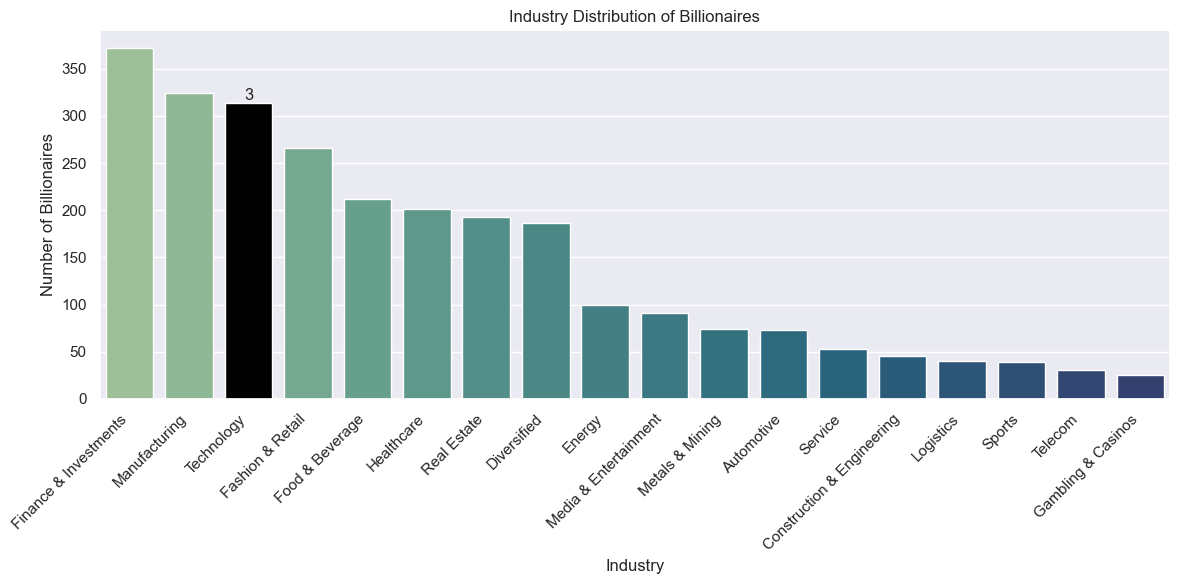

In [9]:
# Calculate the number of billionaires by industry
# 'value_counts()' is used to count the occurrences of each industry in the 'industry' column
industry_dist = billionaires_df["industry"].value_counts()

# Plot a bar-plot of the industry distribution of billionaires
sns.set()
plt.figure(figsize=(12, 6))
industry_dist_plot = sns.barplot(
    x=industry_dist.index,
    y=industry_dist.values,
    hue=industry_dist.index,
    palette="crest"
)

# Change the 'Technology' bar colour to black for readability
# 'get_loc()' is used to get the 'Technology' bar index in the x-axis labels
# 'patches()' is used to access the bar patch and 'set_facecolor()' is used to change the bar colour
tech_industry_index = industry_dist.index.get_loc("Technology")
industry_dist_plot.patches[tech_industry_index].set_facecolor("black")

# Label the 'Technology' bar rank
plt.text(
    tech_industry_index, industry_dist["Technology"], "3", ha="center", va="bottom"
)

# Label and display bar-plot
plt.title("Industry Distribution of Billionaires")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

An analysis of the company distribution of technology billionaires shows that the Meta Platforms company is associated with the most technology billionaires. Further, the subsequent 17 companies following Meta Platforms each fostered two billionaires, signifying a diverse ecosystem of companies contributing to technology billionaires and innovation.

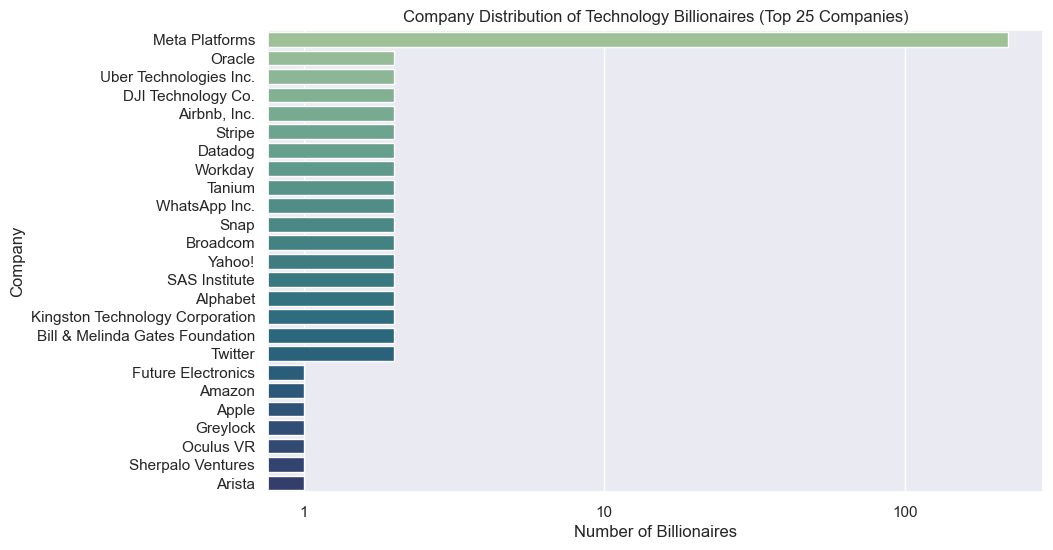

In [10]:
# Filter the DataFrame to only include technology billionaires
tech_billionaires_df = billionaires_df[billionaires_df["industry"] == "Technology"]

# Calculate the number of technology billionaires by company
# 'value_counts()' is used to count the occurrences of each company in the 'organization' column
# 'head(25)' is used to select the top 25 companies for ease of plotting
company_dist = tech_billionaires_df["organization"].value_counts().head(25)

# Plot a horizontal bar-plot of the company distribution of technology billionaires
plt.figure(figsize=(10, 6))
company_dist_plot = sns.barplot(
    x=company_dist.values, y=company_dist.index, hue=company_dist.index, palette="crest"
)

# Adjust the x-axis scale to a logarithmic scale for readability
plt.xscale("log")

# Format the x-axis ticks as integers using 'ScalarFormatter' for readability
plt.gca().xaxis.set_major_formatter(ScalarFormatter())

# Label and display bar-plot
plt.title("Company Distribution of Technology Billionaires (Top 25 Companies)")
plt.ylabel("Company")
plt.xlabel("Number of Billionaires")
plt.show()

Examining the country distribution of technology billionaires reveals that the United States and China contain the most technology billionaires, housing over 70%. This duopoly underscores the dominance and influence of these countries in fostering technological innovation and wealth accumulation. This concentration also reflects the importance of these nations in advancing the technology sector, positioning them as places for visionary leaders.

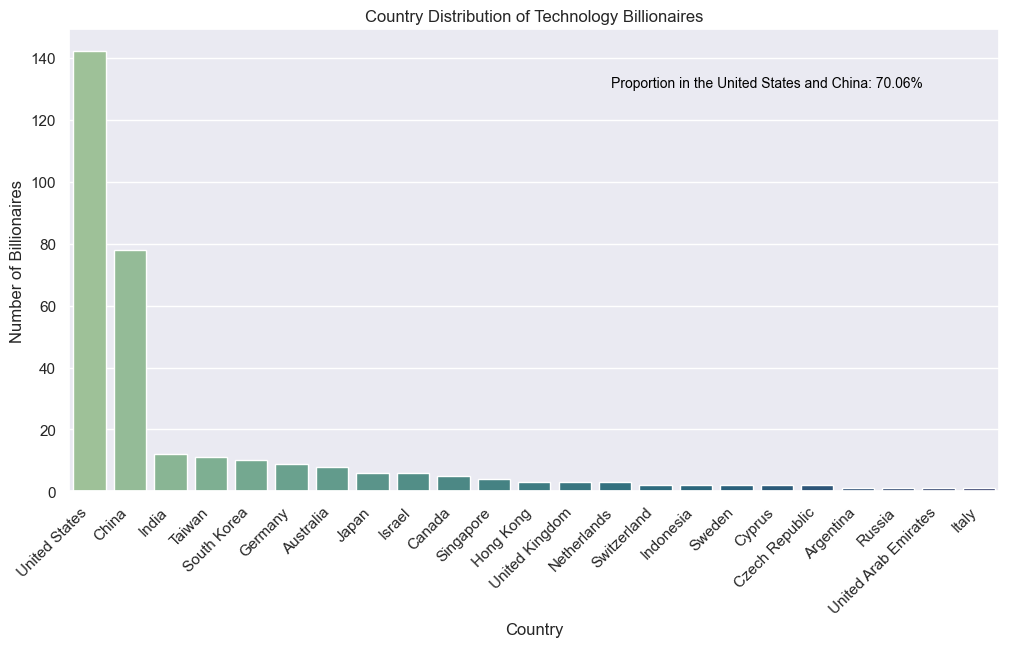

In [11]:
# Calculate the number of technology billionaires
num_tech_billionaires = len(tech_billionaires_df)

# Calculate the number of technology billionaires by country
country_dist = tech_billionaires_df['country'].value_counts()

# Calculate the proportion of technology billionaires in the United States and China
# 'isin()' is used to filter the DataFrame to only include technology billionaires in either country
united_states_china_proportion = (tech_billionaires_df['country'].isin(['United States', 'China']).sum() / num_tech_billionaires) * 100

# Plot a bar-plot of the country distribution of technology billionaires
plt.figure(figsize=(12, 6))
country_dist_plot = sns.barplot(x=country_dist.index, y=country_dist.values, hue=country_dist.index, palette='crest')

# Add a text annotation to plot for the proportion of technology billionaires in the United States and China
plt.annotate(
    f'Proportion in the United States and China: {united_states_china_proportion:.2f}%',
    xy=(0.75, 0.9),
    xycoords='axes fraction', fontsize=10, ha='center', va='top', color='black'
)

# Label and display bar-plot
plt.title('Country Distribution of Technology Billionaires')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=45, ha='right')
plt.show()

Moreover, analyzing the gender distribution of technology billionaires uncovers a notable gender disparity. The figure below indicates that over 90% of technology billionaires identify as male, highlighting a predominantly male presence within the technology sector. In contrast, females account for less than 10% of technology billionaires, emphasizing the gender gap that persists today.

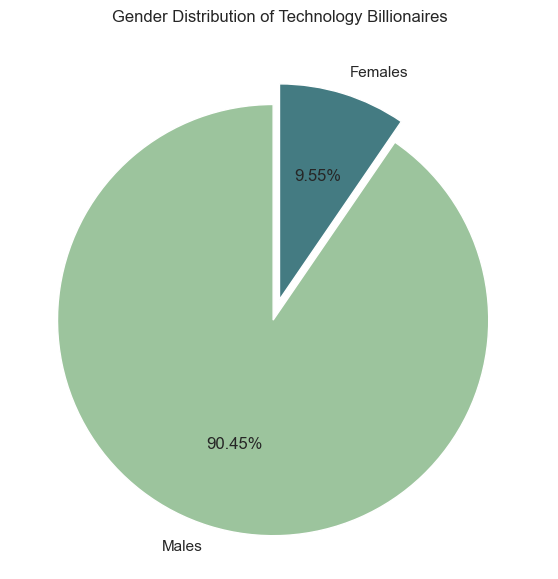

In [12]:
# Create a function to plot pie charts for code efficiency 
def plot_pie_chart(data, labels, title, figure_size):
    plt.figure(figsize=figure_size)
    plt.pie(data, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#9cc49d', '#447b82'], explode=(0.1, 0))
    plt.title(title)
    plt.show()

# Calculate the number of technology billionaires by gender
gender_dist = tech_billionaires_df['gender'].value_counts()

# Plot a pie chart of the gender distribution of technology billionaires
plot_pie_chart(gender_dist, ['Males', 'Females'], 'Gender Distribution of Technology Billionaires', (7, 7))

Exploring the age distribution of technology billionaires reveals that the youngest technology billionaire is a mere 28 years old, while the oldest technology billionaire is 94. Also, on average, technology billionaires were found to be 57 years old. These age ranges and understanding of age demographics speak to the longevity of success within the technology industry, striking a balance between seasoned professionals and emerging leaders.

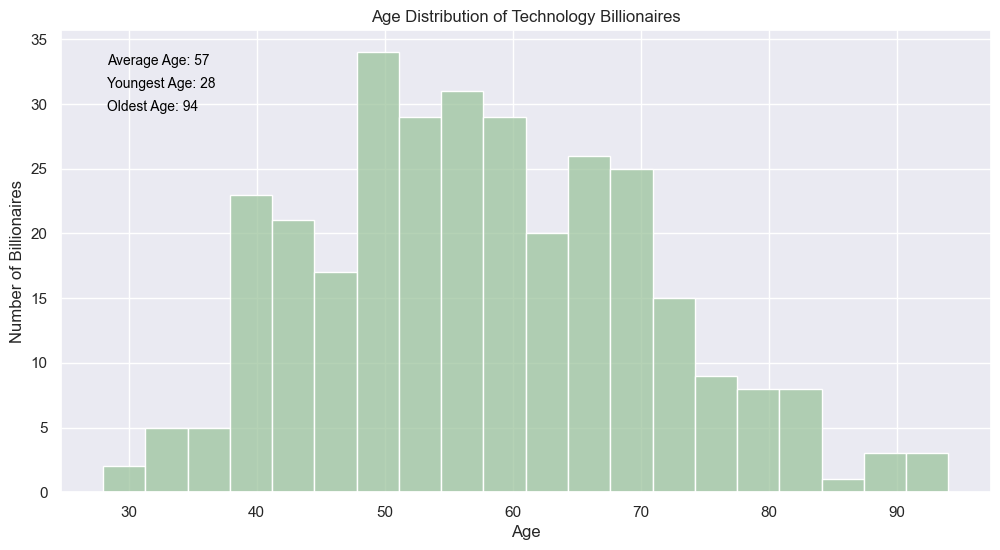

In [13]:
# Calculate the average, youngest, and oldest technology billionaire age
average_tech_billionaire_age = tech_billionaires_df['age'].mean()
youngest_tech_billionaire_age = tech_billionaires_df['age'].min()
oldest_tech_billionaire_age = tech_billionaires_df['age'].max()

# Plot a histogram of the age distribution of technology billionaires
plt.figure(figsize=(12, 6))
tech_billionaire_age_dist_plot = sns.histplot(tech_billionaires_df['age'], bins=20, color='#9cc49d')

# Create a list of annotations to add to the plot
annotations = [
    f'Average Age: {average_tech_billionaire_age:.0f}',
    f'Youngest Age: {youngest_tech_billionaire_age:.0f}',
    f'Oldest Age: {oldest_tech_billionaire_age:.0f}'
]

# Add text annotations to the plot by iterating through the 'annotations' list
# Annotations are added at set coordinates relative to the axes
# Each subsequent annotation is placed lower vertically for readability
for i, annotation in enumerate(annotations):
    plt.annotate(annotation,
        xy=(0.05, 0.95 - i * 0.05), 
        xycoords='axes fraction', fontsize=10, 
        ha='left', 
        va='top', 
        color='black'
    )
    
# Label and display histogram
plt.title('Age Distribution of Technology Billionaires')
plt.xlabel('Age')
plt.ylabel('Number of Billionaires')
plt.show()

The figure below shows the distribution of average billionaire ages by industry. Notably, the average billionaire age is 65 compared to the average technology billionaire age found earlier of 57. This result indicates that technology billionaires are usually eight years younger than billionaires in other sectors, suggesting that the technology industry has younger individuals attaining financial stability. Further, the figure shows that the technology industry has the youngest billionaires, establishing its role in defining the future.

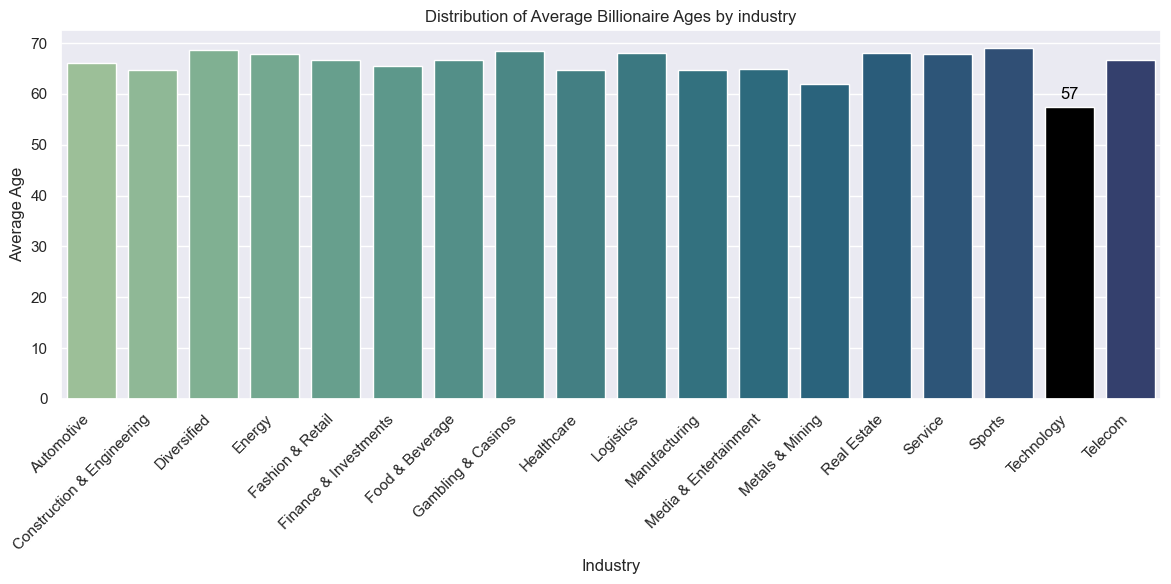

In [14]:
# Group billionaire industries and calculate the average age
# 'groupby()' is used to group the DataFrame 'industry' column, creating distinct industry groups
# 'reset_index()' is used to convert the Series into a DataFrame for ease of plotting
average_billionaire_age_by_industry_dist = billionaires_df.groupby('industry')['age'].mean().reset_index()

# Plot a bar-plot of the distribution of average billionaire ages by industry
plt.figure(figsize=(12, 6))
billionaire_age_by_industry_dist_plot = sns.barplot(
    x='industry', 
    y='age', 
    data=average_billionaire_age_by_industry_dist,
    hue='industry',
    palette="crest"
)

# Change the 'Technology' bar colour to black
# 'patches()' is used to access the bar patch and 'set_facecolor()' is used to change the bar colour
tech_industry_index = average_billionaire_age_by_industry_dist[
    average_billionaire_age_by_industry_dist['industry'] == 'Technology'
].index
billionaire_age_by_industry_dist_plot.patches[tech_industry_index[0]].set_facecolor('black')

# Label the 'Technology' bar average age
plt.annotate(
    f'{average_tech_billionaire_age:.0f}',
    xy=(tech_industry_index[0], average_tech_billionaire_age),
    xytext=(0, 3),
    textcoords='offset points',
    ha='center', va='bottom', color='black'
)

# Label and display bar-plot
plt.title('Distribution of Average Billionaire Ages by industry')
plt.xlabel('Industry')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Interestingly, analyzing the relationship between the age and net worth of technology billionaires exposes no clear correlation between age and net worth. Younger and older technology billionaires tend to have similar net worths. However, there are outliers, with some technology billionaires exhibiting a net worth considerably higher than their peers. This result suggests that other factors may play a significant role in determining the net worth of technology billionaires.

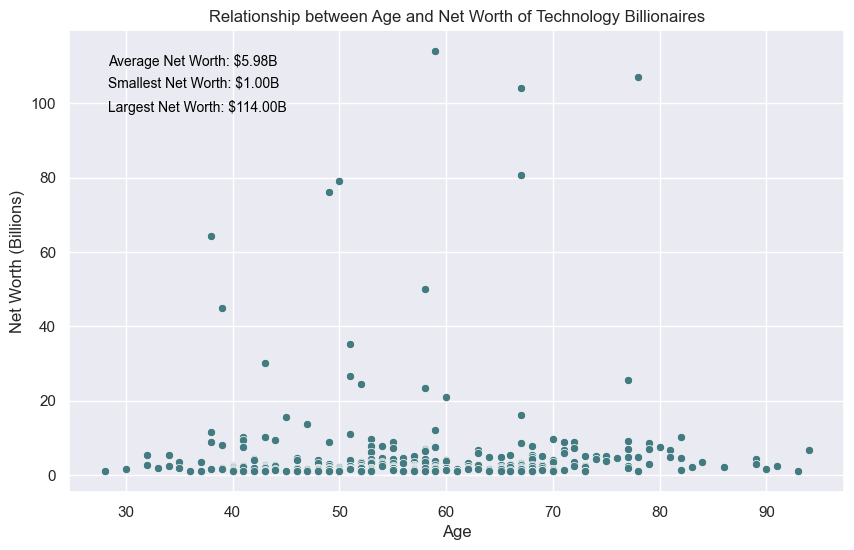

In [15]:
# Calculate the average, smallest, and largest technology billionaire net worth
average_tech_billionaire_net_worth = tech_billionaires_df['net_worth (billions)'].mean()
smallest_tech_billionaire_net_worth = tech_billionaires_df['net_worth (billions)'].min()
largest_tech_billionaire_net_worth = tech_billionaires_df['net_worth (billions)'].max()

# Plot a scatter plot of the relationship between technology billionaires' age and net worth
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='age', y='net_worth (billions)', data=tech_billionaires_df, color='#447b82')

# Create a list of annotations to add to the plot
annotations = [
    f'Average Net Worth: ${average_tech_billionaire_net_worth:.2f}B',
    f'Smallest Net Worth: ${smallest_tech_billionaire_net_worth:.2f}B',
    f'Largest Net Worth: ${largest_tech_billionaire_net_worth:.2f}B'
]

# Add text annotations to the plot by iterating through the 'annotations' list
# Annotations are added at set coordinates relative to the axes
# Each subsequent annotation is placed lower vertically for readability
for i, annotation in enumerate(annotations):
    plt.annotate(annotation,
        xy=(0.05, 0.95 - i * 0.05), 
        xycoords='axes fraction', 
        fontsize=10, ha='left', 
        va='top', 
        color='black'
    )

# Label the display scatter plot
plt.title('Relationship between Age and Net Worth of Technology Billionaires')
plt.xlabel('Age')
plt.ylabel('Net Worth (Billions)')
plt.show()

### Proportions
I will now explore proportions in the Billionaire Statistics dataset. The figures below show the proportion of technology billionaires globally. Seemingly, approximately 12% of billionaires are in the technology sector. Also, among the top 10 billionaires, an even more notable 40% are in the technology sector. These proportions highlight the prominence of the technology sector globally in wealth expansion and representation among some of the most affluent individuals.

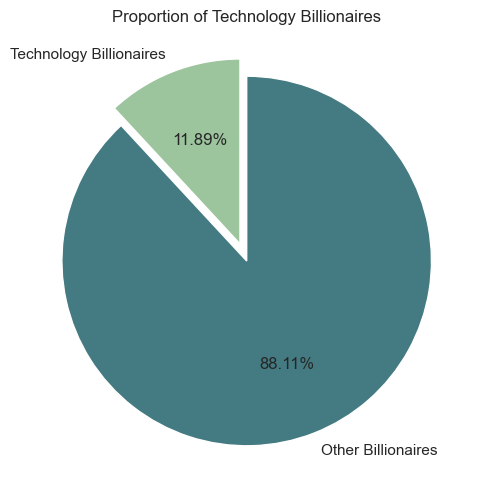

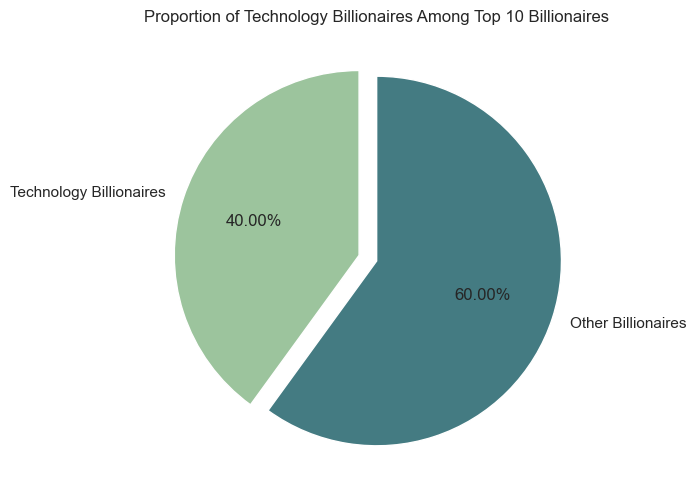

In [16]:
# Calculate the number of billionaires
num_billionaires = len(billionaires_df)

# Calculate the number of technology billionaires among the top 10 billionaires
# 'eq()' is used as a shorthand for equality comparison for code efficiency
num_top_tech_billionaires = billionaires_df.head(10)['industry'].eq('Technology').sum()

# Calculate the proportion of technology billionaires
tech_billionaires_proportion = (num_tech_billionaires / num_billionaires) * 100
top_tech_billionaires_proportion = (num_top_tech_billionaires / 10) * 100

# Plot pie charts of the proportion of technology billionaires using the 'plot_pie_chart' function
plot_pie_chart(
    [tech_billionaires_proportion, 100 - tech_billionaires_proportion],
    ['Technology Billionaires', 'Other Billionaires'],
    'Proportion of Technology Billionaires', (8, 6)
)

plot_pie_chart(
    [top_tech_billionaires_proportion, 100 - top_tech_billionaires_proportion],
    ['Technology Billionaires', 'Other Billionaires'],
    'Proportion of Technology Billionaires Among Top 10 Billionaires', (8, 6)
)

An analysis of the proportion of self-made technology billionaires reveals that approximately 93% are self-made. This high percentage underscores the entrepreneurial nature and self-driven success within the industry. It also implies a culture that values innovation and risk-taking, which aligns with the industry's reputation for fostering startup companies.

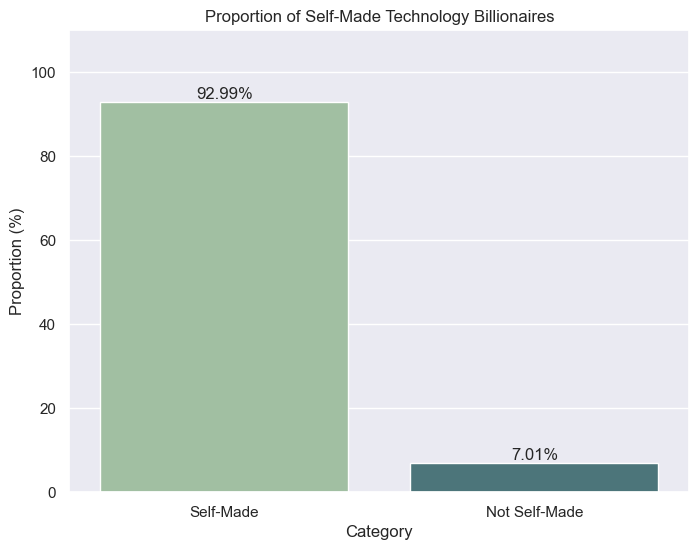

In [17]:
# Calculate the number of self-made technology billionaires
num_self_made_tech_billionaires = tech_billionaires_df['self_made'].sum()

# Calculate the proportion of self-made technology billionaires
self_made_tech_billionaires_proportion = (num_self_made_tech_billionaires / num_tech_billionaires) * 100

# Plot a bar-plot of the proportion of self-made technology billionaires
plt.figure(figsize=(8, 6))
self_made_tech_billionaires_plot = sns.barplot(
    x=['Self-Made', 'Not Self-Made'],
    y=[self_made_tech_billionaires_proportion, 100 - self_made_tech_billionaires_proportion],
    hue=['Self-Made', 'Not Self-Made'],
    palette=['#9cc49d', '#447b82']
)

# Adjust the y-axis limits to extend higher for readability
self_made_tech_billionaires_plot.set_ylim(0, 110)

# Label the proportions on the bar-plot bars by iterating through the proportions
for index, value in enumerate([self_made_tech_billionaires_proportion, 100 - self_made_tech_billionaires_proportion]):
    self_made_tech_billionaires_plot.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Label and display bar-plot
plt.title('Proportion of Self-Made Technology Billionaires')
plt.xlabel('Category')
plt.ylabel('Proportion (%)')
plt.show()

Furthermore, exploring the relationship between whether a technology billionaire is self-made and their net worth shows that self-made ones have a notably higher average net worth than their counterparts. Specifically, the average net worth of self-made technology billionaires is over 12% greater than those not self-made. This contrast stresses the impact of entrepreneurial prowess within the sector, where personal acumen and innovation contribute immensely to financial achievements.

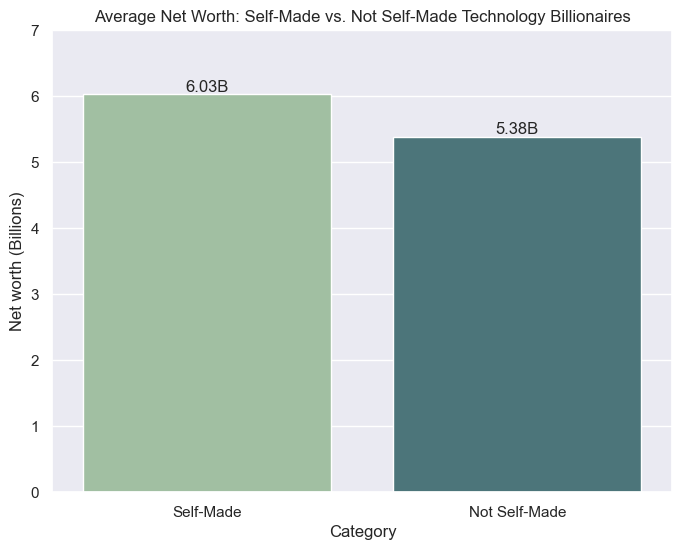

In [18]:
# Calculate the average net worth of self-made and not self-made technology billionaires
average_self_made_net_worth = tech_billionaires_df.loc[
    tech_billionaires_df["self_made"] == True, "net_worth (billions)"
].mean()
average_non_self_made_net_worth = tech_billionaires_df.loc[
    tech_billionaires_df["self_made"] == False, "net_worth (billions)"
].mean()

# Plot a bar-plot of the comparison between net worth and being a self-made technology billionaire
plt.figure(figsize=(8, 6))
self_made_net_worth_plot = sns.barplot(
    x=["Self-Made", "Not Self-Made"],
    y=[average_self_made_net_worth, average_non_self_made_net_worth],
    hue=["Self-Made", "Not Self-Made"],
    palette=["#9cc49d", "#447b82"],
)

# Adjust the y-axis limits to extend higher for readability
self_made_net_worth_plot.set_ylim(0, 7)

# Label the average net worths on the bar-plot bars by iterating through the proportions
for index, value in enumerate(
    [average_self_made_net_worth, average_non_self_made_net_worth]
):
    self_made_net_worth_plot.text(
        index, value, f"{value:.2f}B", ha="center", va="bottom"
    )

# Label and display bar-plot
plt.title("Average Net Worth: Self-Made vs. Not Self-Made Technology Billionaires")
plt.xlabel("Category")
plt.ylabel("Net worth (Billions)")
plt.show()

## Discussion

In this exploration, I explored technology industry billionaires using exploratory analyses focusing on their relationships, peculiarity, and the state of the technology sector. The technology industry being the third most prominent billionaire sector, emphasizes its ample role in shaping the contemporary economic landscape, promising for prospective job seekers. The concentration of technology billionaires in the United States and China also solidifies these countries as candidates for individuals who aspire to foster technological innovation while building wealth.

Furthermore, Meta Platforms housing the most technology billionaires highlight the company's ability to foster technological entrepreneurship, a quality worth considering for job seekers when comparing company cultures in the future. Similarly, the reveal that over 17 companies were responsible for two billionaires in the technology sector signifies that the industry encompasses a collaborative environment where innovation and success are apparent across domains.

The analysis of demographic factors uncovering a gender disparity, with over 90% of technology industry billionaires identifying as male, showcases the industry's need for continued efforts to address gender variety. Women with a current and developing passion for the technology industry are encouraged to pursue the field despite existing societal norms. Additionally, the examination of age distributions highlighted the extensive age range within the sector, with an average technology billionaire being 57 years old, underlining the coexistence of experienced leaders and the youthful energy propelling the industry forward. Likewise, technology billionaires being eight years younger than billionaires in other sectors, on average, demonstrates the sector's youthfulness. However, the absence of an explicit correlation between age and net worth suggests that factors beyond age significantly contribute to the variation in net worth within the industry.

Moreover, the 12% proportion of technology billionaires and 40% among the top 10 billionaires underscores the industry's prominence and the satisfaction gained from it by current working professionals. Hence, people in training are motivated to continue learning and use the tenacity expressed by technology billionaires as inspiration during their endeavours. Also, the revelation that 93% of technology billionaires are self-made establishes the sector's pioneering nature and the value placed on pushing technological boundaries. Self-made technology billionaires having notably higher net worths also convey the competitive nature of the industry, in that an innate desire to innovate accompanied by personal acumen significantly contributes to success in the sector.

In summary, this exploration offers valuable insights into the dynamics of technology industry billionaires, providing an illustrative perspective on their distribution, demographics, and proportions within the global billionaire environment. These results contribute to the broader conversation on the state of the industry, being responsible for building immense wealth, promoting innovation, and being a home for those who strive to be leaders in our modern society. It also suggests that intrigued professionals, especially women, should feel empowered to explore opportunities in the sector moving forward and contribute to the developments that improve people's lives.

## References

#### Dataset
- Kaggle. "Billionaires Statistics Dataset (2023)". Retrieved from: [Billionaires Statistics Dataset](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset) [1]

#### Libraries
- McKinney, W. et al. (2020). "pandas - Python Data Analysis Library". Retrieved from: [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/) [2]
- Waskom, M. et al. (2022). "seaborn: statistical data visualization". Retrieved from: [Seaborn Documentation](https://seaborn.pydata.org/) [3]
- Hunter, J. D. (2007). "Matplotlib: A 2D Graphics Environment". Retrieved from: [Matplotlib Documentation](https://matplotlib.org/) [4]
